In [1]:
%matplotlib inline

# APSG tutorial - structural geology module for Python

**APSG** defines several new python classes to easily manage, analyze and visualize orientation structural geology data. Base class ``Vec3`` is derived from ``numpy.array`` class and offers several new method which will be explained in following examples.

## Basic usage

**APSG** module could be imported either into own name space or into active one for easier interactive work

In [2]:
from apsg import *
settings['figsize'] = (10, 8)

### Basic operations with vectors
Instance of vector object ``Vec3`` could be created from any iterable object as list, tuple or array

In [3]:
u = Vec3([1, -2, 3])
v = Vec3([-2, 1, 1])

For common vector operation we can use standard mathematical operators or special methods using dot notation

In [4]:
u + v

V(-1.000, -1.000, 4.000)

In [5]:
u - v

V(3.000, -3.000, 2.000)

In [6]:
3*u - 2*v

V(7.000, -8.000, 7.000)

Its magnitude or length is most commonly defined as its Euclidean norm and could be calculated using ``abs``

In [7]:
abs(v)

2.449489742783178

In [8]:
abs(u + v)

4.242640687119285

For *dot product* we can use multiplication operator ``*`` or ``dot`` method

In [9]:
u*v

-1

In [10]:
u.dot(v)

-1

For *cross product* we can use operator ``**`` or method ``cross``

In [11]:
u**v

V(-5.000, -7.000, -3.000)

In [12]:
u.cross(v)

V(-5.000, -7.000, -3.000)

To project vector ``u`` onto vector ``v`` we can use method ``proj``

In [13]:
u.proj(v)

V(0.816, -0.408, -0.408)

To find angle (in degrees) between to vectors we use method ``angle``

In [14]:
u.angle(v)

96.26395271992722

Method ``rotate`` provide possibility to rotate vector around another vector. For example, to rotate vector ``u`` around vector ``v`` for 45°

In [15]:
u.rotate(v, 45)

V(2.248, 0.558, 2.939)

## Classes Lin and Fol
To work with orientation data in structural geology, **APSG** provide two classes derived from ``Vec3`` class. There is ``Fol`` class to represent planar features by planes and ``Lin`` class to represent linear feature by lines. Both classes provide all ``Vec3`` methods, but they differ in way how instance is created and how some operations are calculated, as structural geology data are commonly axial in nature.

To create instance of ``Lin`` or ``Fol`` class, we have to provide dip direction and dip, both in degrees

In [16]:
Lin(120, 60), Fol(216, 62)

(L:120/60, S:216/62)

or we can create instance from ``Vec3`` object using ``aslin`` and ``asfol`` properties

In [17]:
u.aslin, u.asfol

(L:297/53, S:117/37)

### Vec3 methods for Lin and Fol


To find angle between two linear or planar features we can use method ``angle``

In [18]:
l1 = Lin(110, 40)
l2 = Lin(160, 30)
l1.angle(l2)

41.59741268003547

In [ ]:
p1 = Fol(330, 50)
p2 = Fol(250, 40)
p1.angle(p2)

54.69639932197533

We can use *cross product* to construct planar feature defined by two linear features

In [ ]:
l1**l2

S:113/40

or to construct linear feature defined as intersection of two planar features

In [ ]:
p1**p2

L:278/36

*Cross product* of planar and linear features could be used to construct plane defined by linear feature and normal of planar feature

In [ ]:
l2**p2

S:96/53

or to find perpendicular linear feature on given plane

In [ ]:
p2**l2

L:276/37

To rotate structural features we can use method ``rotate``

In [ ]:
p2.rotate(l2, 45)

S:269/78

## Classes Pair and Fault
To work with paired orientation data like foliations and lineations or fault data in structural geology, **APSG** provide two base ``Pair`` class and derived ``Fault`` class. Both classes are instantiated providing dip direction and dip of planar and linear measurements, which are automatically orthogonalized. If misfit is too high, warning is raised. The ``Fault`` class expects one more argument providing sense of movement information, either 1 or -1.

To create instance of ``Pair`` class, we have to provide dip direction and dip of planar and linear feature, both in degrees

In [ ]:
p = Pair(120, 40, 162, 28)
p

P:118/39-163/30

In [ ]:
p.misfit

3.5623168411508175

Planar and linear features are accessible using ``fol`` and ``lin`` properties

In [ ]:
p.fol, p.lin

(S:118/39, L:163/30)

To rotate ``Pair`` instance we can use ``rotate`` method

In [ ]:
p.rotate(Lin(45, 10), 60)

P:314/83-237/61

Instantiation of ``Fault`` class is similar, we just have to provide argument to define sense of movement

In [ ]:
f = Fault(120, 60, 110, 58, -1)  # -1 for normal fault
f

F:120/59-110/59 -

Note the change in sense of movement after ``Fault`` rotation

In [ ]:
f.rotate(Lin(45, 10), 60)

F:312/62-340/59 +

For simple fault analyses ``Fault`` class also provide ``p``, ``t``, ``m`` and ``d`` properties to get PT-axes, kinematic plane and dihedra separation plane

In [ ]:
f.p, f.t, f.m, f.d

(L:315/75, L:116/14, S:27/85, S:290/31)

## Group class
``Group`` class serve as a homogeneous container for ``Lin``, ``Fol`` and ``Vec3`` objects. It allows grouping of features either for visualization or batch analysis

In [ ]:
g = Group([Lin(120,60), Lin(116,50), Lin(132,45), Lin(90,60), Lin(84,52)], name='L1')
g

G:5 Lin (L1)

To simplify interactive group creation, you can use function ``G``

In [ ]:
g = G('120 60 116 50 132 45 90 60 84 52', name='L1')
g

G:5 Lin (L1)

Method ``len`` returns number of features in group

In [ ]:
len(g)

5

Most of the ``Lin``, ``Fol`` and ``Vec3`` methods could be used for ``Group`` as well. For example, to measure angles between all features in group and another feature, we can use method ``angle``

In [ ]:
g.angle(Lin(110,50))

array([11.49989817,  3.85569115, 15.61367789, 15.11039885, 16.3947936 ])

To rotate all features in group around another feature, we can use method ``rotate``

In [ ]:
gr = g.rotate(Lin(150, 30), 45)

To show data in list you can use ``data`` property

In [ ]:
gr.data

[L:107/35, L:113/26, L:126/30, L:93/26, L:94/18]

Property ``R`` gives mean or resultant of all features in group. Note that ``Lin`` and ``Fol`` are axial in nature, so resultant vector is not reliable. You can use ``ortensor`` property.

In [ ]:
g.R

L:110/55

``Group`` class offers several methods to infer spherical statistics as spherical variance, Fisher's statistics, confidence cones on data etc.

In [ ]:
g.var

0.023371684474384757

In [ ]:
g.fisher_stats

{'k': 34.22945405911139, 'a95': 13.264029905117217, 'csd': 13.844747281750866}

In [ ]:
g.delta

12.411724720740457

To calculate orientation tensor of all features in group, we can use ``ortensor`` property.

In [ ]:
g.ortensor

Ortensor: L1 Kind: LLS
(E1:0.954,E2:0.04021,E3:0.005749)
[[ 0.07398181 -0.09605477 -0.14324311]
 [-0.09605477  0.28446118  0.42092899]
 [-0.14324311  0.42092899  0.64155701]]

## Tensor classes
``Tensor`` metaclass represents 3x3 tensor quantities used commonly in structural geology analysis. Eigenvalues and eigenvectors could be obtained by methods ``eigenvals`` and ``eigenvects``. Eigenvectors could be also represented by linear or planar features using properties ``eigenlins`` and ``eigenfols``. Several properties are implemented, e.g. ``E1``, ``E2`` and ``E3`` for individual eigenvalues, Woodcock's ``shape`` and ``strength``, ``k``, ``K``, ``d`` and ``D`` for Flinn's and Ramsay symmetries and intensities, ``lode``for Lode's parameter etc. For more check documentation.

### Ortensor class
``Ortensor`` class represents orientation tensor of set of planar or linear features. In adition to ``Tensor`` properties, properties to describe orientation distribution are also impleneted, e.g. Vollmer's ``P``, ``G``, ``R`` and ``B`` indexes, ``Intensity`` for Lisle intensity index and ``MAD`` for approximate angular deviation from plane or line. 

In [ ]:
ot = Ortensor(g)
ot.eigenvals

(0.954038468659639, 0.04021274946196462, 0.005748781878396576)

In [ ]:
ot.eigenvects.data

[V(-0.192, 0.542, 0.818), V(0.981, 0.082, 0.176), V(-0.028, -0.836, 0.547)]

In [ ]:
ot.eigenlins.data

[L:110/55, L:5/10, L:268/33]

In [ ]:
ot.eigenfols.data

[S:290/35, S:185/80, S:88/57]

In [ ]:
ot.strength, ot.shape

(5.111716009046827, 1.6278666609094004)

In [ ]:
ot.k, ot.d

(3.7906192743213825, 23.502244704493638)

In [ ]:
ot.K, ot.D

(1.6278666609094004, 13.810636174958068)

In [ ]:
ot.P, ot.G, ot.R

(0.9138257191976744, 0.06892793516713608, 0.017246345635189727)

## Ellipsoid class
``Ellipsoid`` class could be used to represents either ellipsoid objects or strain ellipsoid. It could be instantiated from ``DefGrad`` (represents Finger tensor), principal axes or directly from 3x3 matrix-like object.

In [ ]:
E = Ellipsoid.from_axes(x=4, y=3, z=1)
E

Ellipsoid:  Kind: SSL
(E1:4,E2:3,E3:1)
[[16  0  0]
 [ 0  9  0]
 [ 0  0  1]]

In [ ]:
F = DefGrad.from_comp(xx=2, xy=2, yz=2, zz=0.5)
E = Ellipsoid.from_defgrad(F)
E

Ellipsoid: D Kind: SSL
(E1:3.004,E2:2.049,E3:0.1624)
[[8.   2.   0.  ]
 [2.   5.   1.  ]
 [0.   1.   0.25]]

In [ ]:
E.eigenlins.data

[L:27/3, L:118/13, L:284/77]

In [ ]:
E.eigenfols.data

[S:207/87, S:298/77, S:104/13]

## StereoNet class
Any ``Fol``, ``Lin``, ``Group``, ``Tensor`` object could be visualized as plane, line or pole in stereographic projection using ``StereoNet`` class

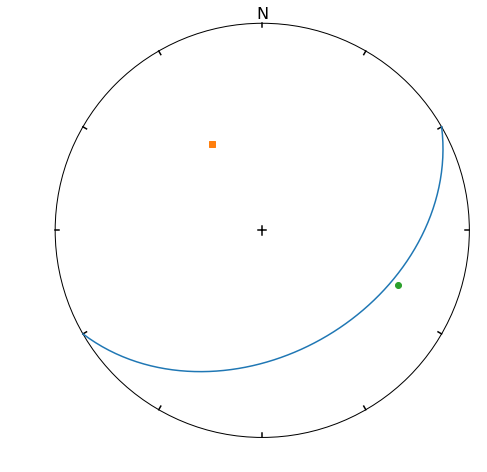

In [ ]:
s = StereoNet()
s.plane(Fol(150, 40))
s.pole(Fol(150, 40))
s.line(Lin(112, 30))
s.show()

When ``StereoNet`` class instance is created with arguments, they are immidiatelly plotted. Most of the objects provided by **APSG** could be plotted. Here we use the ``Group`` object and principal planes and lines of ``Ortensor``:

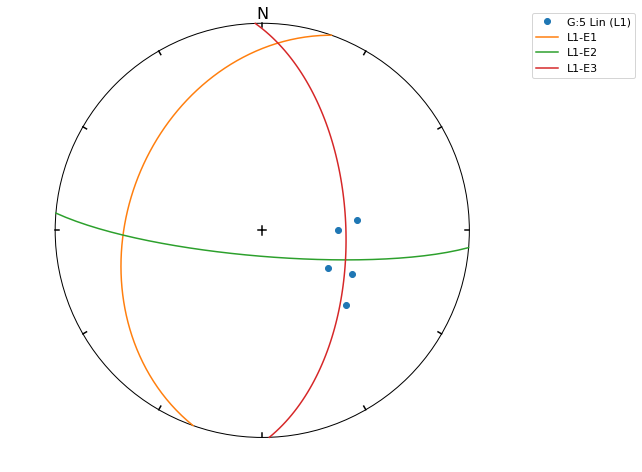

In [ ]:
StereoNet(g, ot);

A small circles (or cones) could be plotted as well

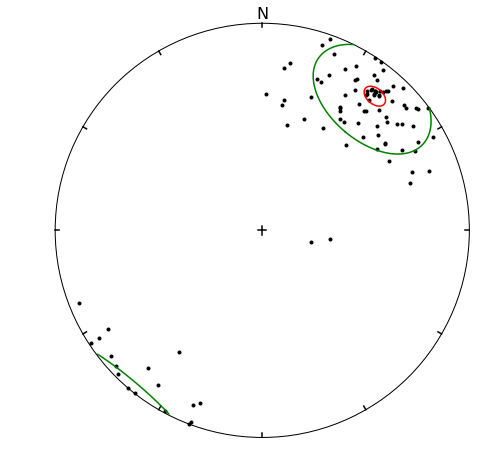

In [ ]:
s = StereoNet()
g = Group.randn_lin(mean=Lin(40, 15))
s.line(g, 'k.')
s.cone(g.R, g.fisher_stats['a95'], 'r')  # confidence cone on resultant
s.cone(g.R, g.fisher_stats['csd'], 'g')  # confidence cone on 63% of data
s.show()

To make density contours plots, a ``contour`` and ``contourf`` methods are available

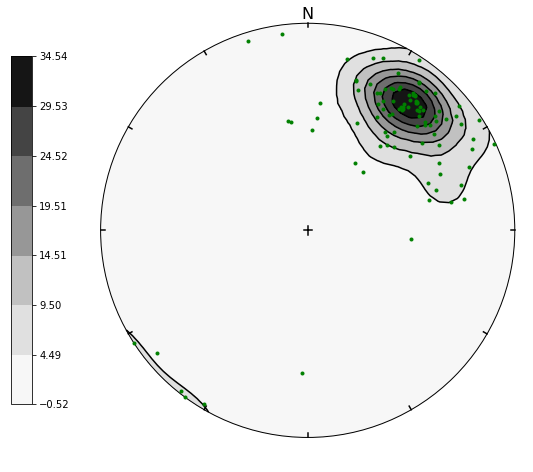

In [ ]:
s = StereoNet()
g = Group.randn_lin(mean=Lin(40, 20))
s.contourf(g, 8, legend=True, sigma=2)
s.line(g, 'g.')
s.show()

Except ``Group``, **APSG** provides ``PairSet`` and ``FaultSet`` classes to store ``Pair`` or ``Fault`` datasets. It can be inicialized by passing list of ``Pair`` or ``Fault`` objects as argument or use class methods ``from_array`` or ``from_csv``

In [ ]:
p = PairSet([Pair(120, 30, 165, 20),
             Pair(215, 60, 280,35),
             Pair(324, 70, 35, 40)])
p.misfit

array([2.0650076 , 0.74600727, 0.83154705])

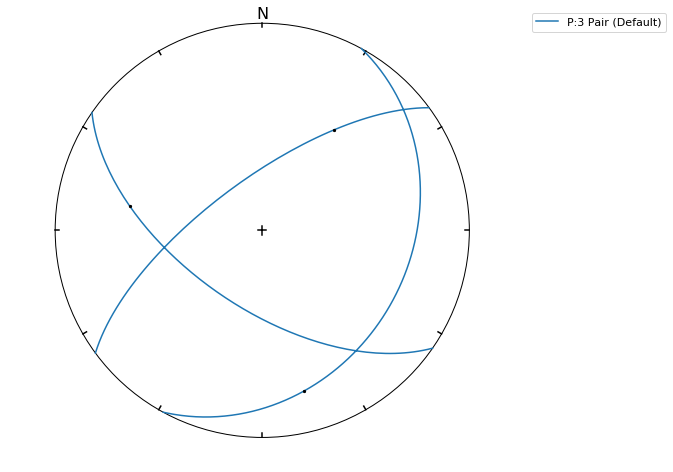

In [ ]:
StereoNet(p);

``StereoNet`` has two special methods to visualize fault data. Method ``fault`` produce classical Angelier plot

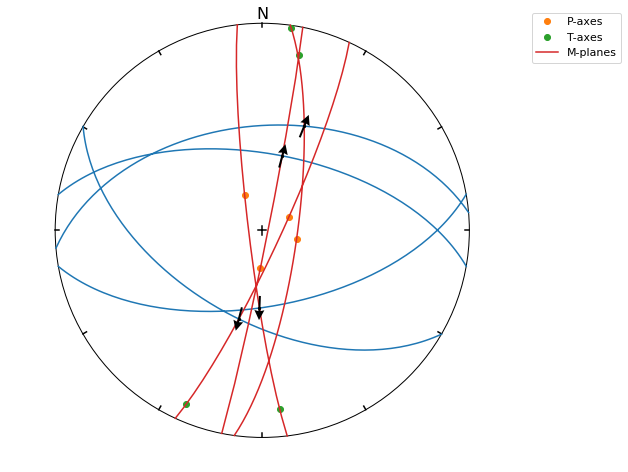

In [ ]:
f = FaultSet([Fault(170, 60, 182, 59, -1),
              Fault(210, 55, 195, 53, -1),
              Fault(10, 60, 15, 59, -1),
              Fault(355, 48, 22, 45, -1)])
s = StereoNet()
s.fault(f)
s.line(f.p, label='P-axes')
s.line(f.t, label='T-axes')
s.plane(f.m, label='M-planes')
s.show()

``hoeppner`` method produce Hoeppner diagram and must be invoked from ``StereoNet`` instance

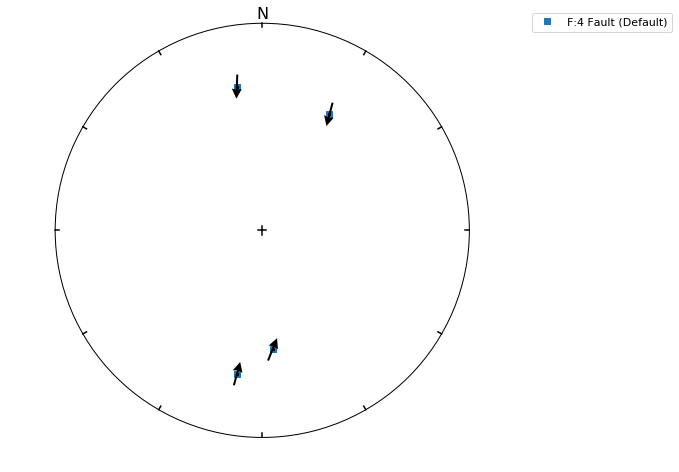

In [ ]:
s = StereoNet()
s.hoeppner(f, label=repr(f))
s.show()

Note that ``fault`` method is used, when data are passed directly to ``StereoNet`` instance

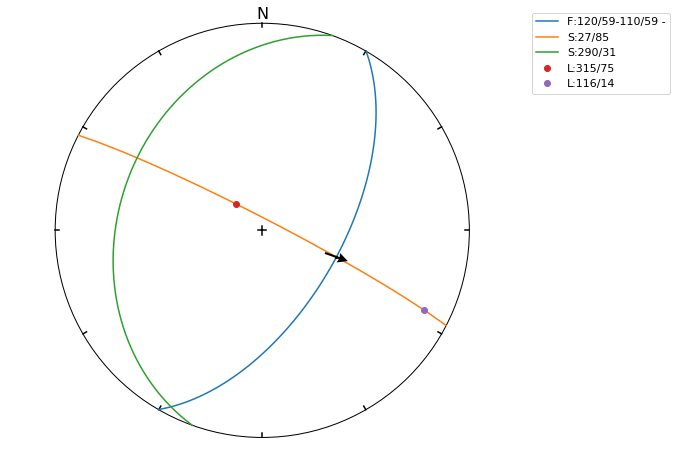

In [ ]:
f = Fault(120, 60, 110, 58, -1)
StereoNet(f, f.m, f.d, f.p, f.t);

## StereoGrid class
``StereoGrid`` class allows to visualize any scalar field on StereoNet. Internally it is used for plotting contour diagrams, but it exposes ``apply_func`` method to calculate scalar field by any user-defined function. Function must accept three element ``numpy.array`` as first argument passed from grid points of ``StereoGrid``.

Following example defines function to calculate resolved shear stress on plane from given stress tensor. ``StereoGrid`` is used to calculate this value over all directions and finally values are plotted by ``StereoNet``

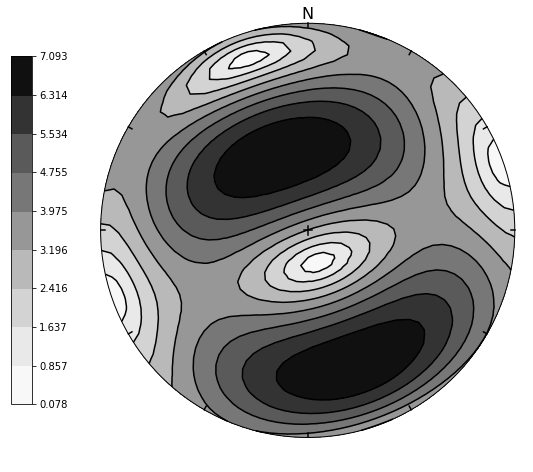

In [ ]:
S = Stress([[-10, 2, -3],[2, -5, 1], [-3, 1, 2]])
d = StereoGrid()
d.apply_func(S.shear_stress)
s = StereoNet()
s.contourf(d, 10, legend=True)
s.show()

The ``FaultSet`` provide also ``amgmech`` method which provide access to Angelier dihedra method. Results are stored in ``StereoGrid``. Default behavior is to calculate counts (positive in extension, negative in compression)

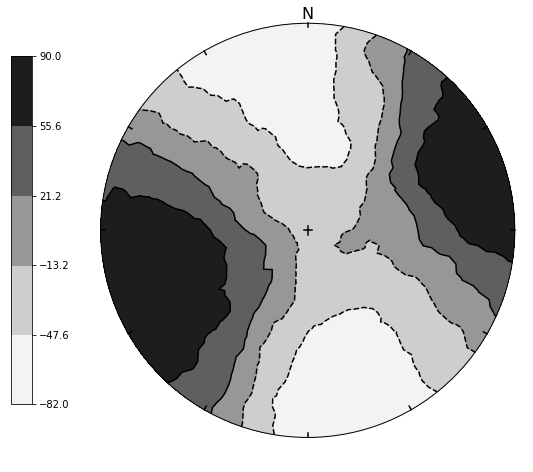

In [ ]:
f = FaultSet.examples('MELE')
StereoNet(f.angmech());

Setting method to 'probability', maximum likelihood estimate is calculated.

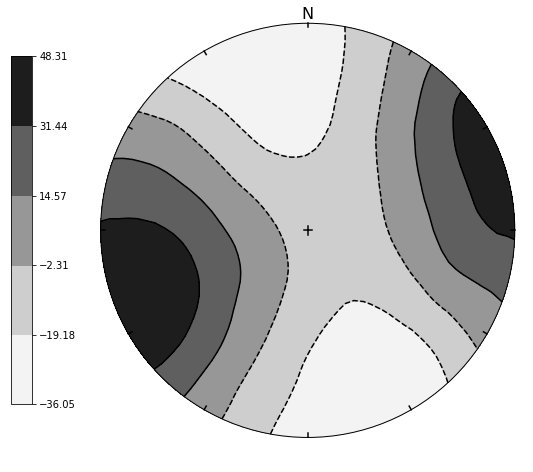

In [ ]:
f = FaultSet.examples('MELE')
StereoNet(f.angmech(method='probability'));

## Fabric plots
Tensor-type objects (``Ortensor``, ``Ellipsoid``) could be visualized in several specialized plots. ``RamsayPlot`` class provide Ramsay modification of Flinn's deformation diagram, while ``FabricPlot`` class provide triangular fabric plot (Vollmer, 1989).

In [ ]:
g1 = Group.examples('B2')
g2 = Group.examples('B4')
g3 = Group.uniform_lin(name='Uniform')

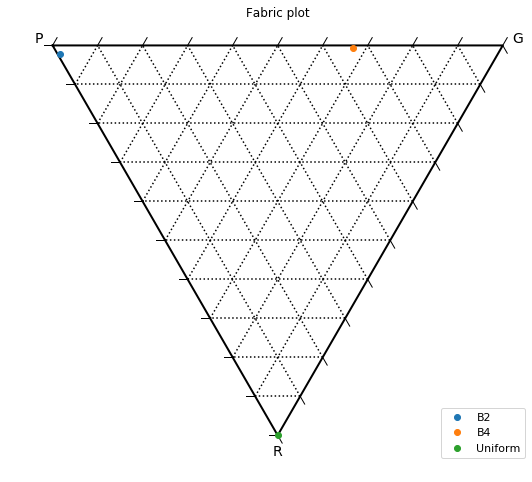

In [ ]:
FabricPlot(g1, g2, g3);

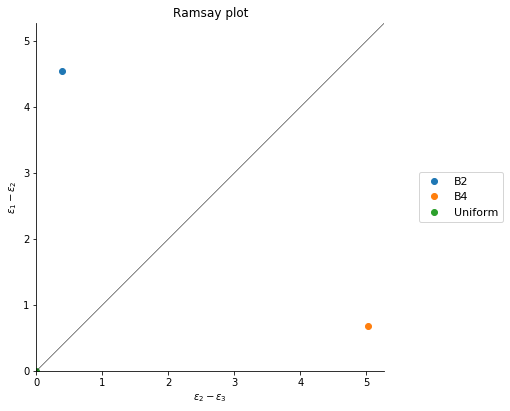

In [ ]:
RamsayPlot(g1, g2, g3);

``RamsayPlot`` and ``FabricPlot`` has ``path`` method which accepts list of ``Tensor`` objects plotted as line.

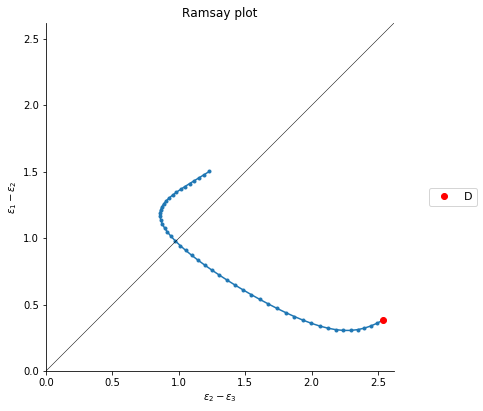

In [ ]:
L = VelGrad.from_comp(xx=-2, zz=2)
Eevol = [E.transform(L.defgrad(t/50)) for t in range(50)]
r = RamsayPlot()
r.path(Eevol)
r.plot(E, 'ro')
r.show()

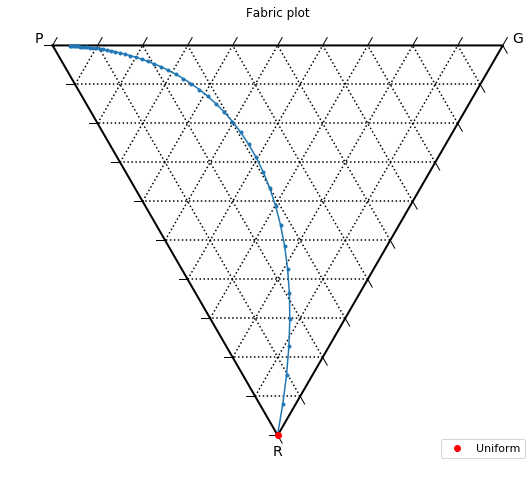

In [ ]:
ot = g3.ortensor
otevol = [g3.transform(L.defgrad(t/50)).ortensor for t in range(50)]
f = FabricPlot()
f.path(otevol)
f.plot(ot, 'ro')
f.show()

## Cluster class
``Cluster`` class provide access to **scipy** hierarchical clustering. Distance matrix is calculated as mutual angles of features within Group keeping axial and/or vectorial nature in mind. ``Cluster.explain`` method allows to explore explained variance versus number of clusters relation. Actual cluster is done by ``Cluster.cluster`` method, using distance or maxclust criterion. Using of ``Cluster`` is explained in following example. We generate some data and plot dendrogram

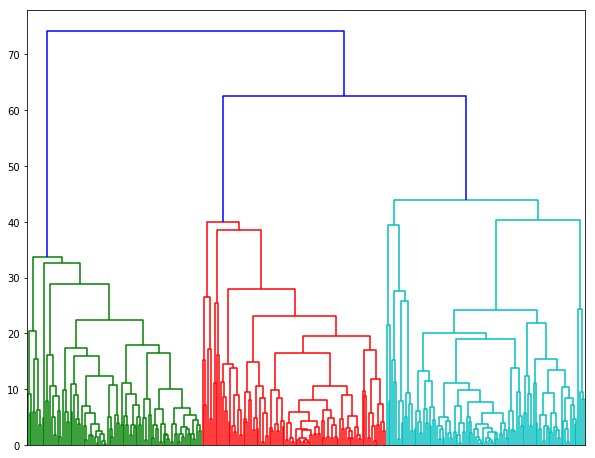

In [ ]:
g1 = Group.randn_lin(mean=Lin(45,30))
g2 = Group.randn_lin(mean=Lin(320,56))
g3 = Group.randn_lin(mean=Lin(150,40))
g = g1 + g2 + g3
cl = Cluster(g)
cl.dendrogram(no_labels=True)

Now we can explore evolution of within-groups variance versus number of clusters on Elbow plot (Note change in slope for three clusters)

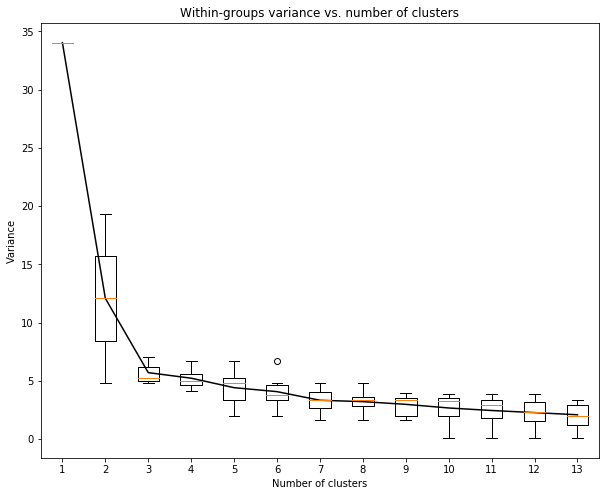

In [ ]:
cl.elbow()

Finally we can do clustering and plot created clusters

In [ ]:
cl.cluster(maxclust=3)
cl.R.data  # Restored centres of clusters

[L:150/38, L:41/28, L:321/60]

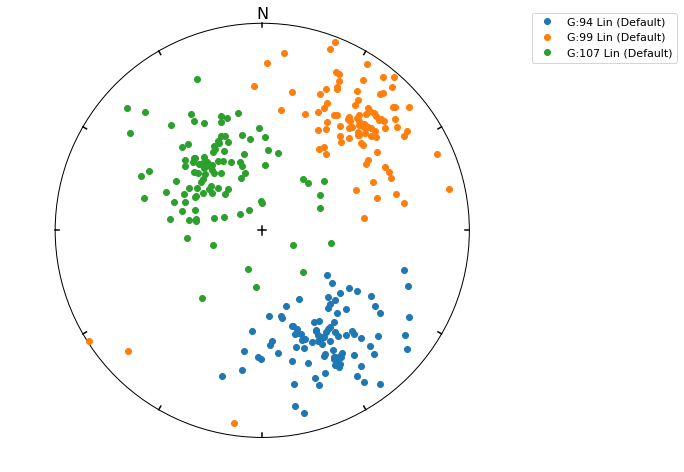

In [ ]:
StereoNet(*cl.groups);

## Some tricks

Double cross products are allowed but not easy to understand.

For example ``p**l**p`` is interpreted as ``p**(l**p)``: a) ``l**p`` is plane defined by ``l`` and ``p`` normal b) intersection of this plane and ``p`` is calculated

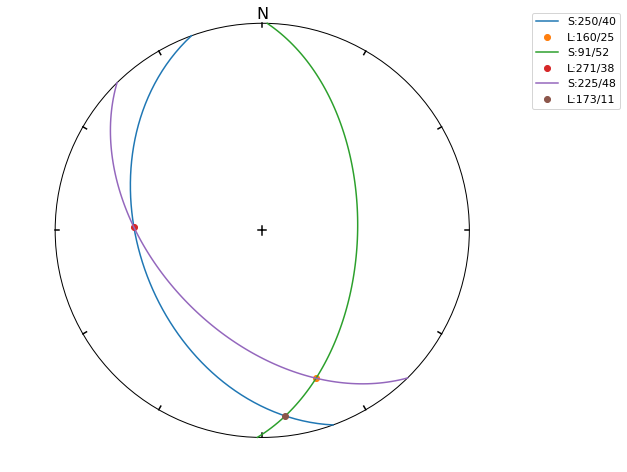

In [ ]:
p = Fol(250,40)
l = Lin(160,25)
StereoNet(p, l, l**p, p**l, l**p**l, p**l**p);

``Pair`` class could be used to correct measurements of planar linear features which should spatialy overlap

In [ ]:
pl = Pair(250, 40, 160, 25)
pl.misfit

18.889520432245405

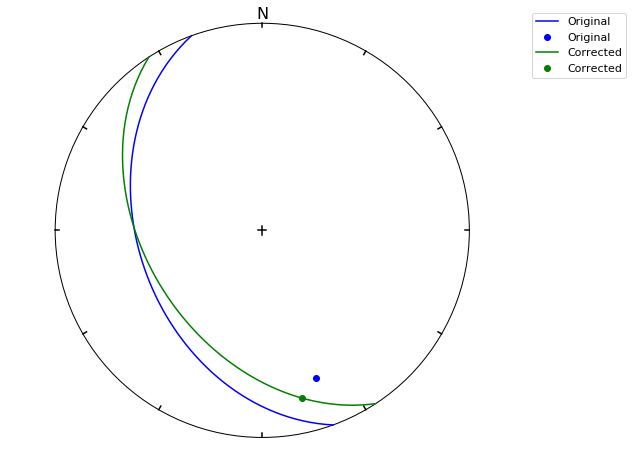

In [ ]:
s = StereoNet()
s.plane(Fol(250, 40), 'b', label='Original')
s.line(Lin(160, 25), 'bo', label='Original')
s.plane(pl.fol, 'g', label='Corrected')
s.line(pl.lin, 'go', label='Corrected')
s.show()

``StereoNet`` has method ``arrow`` to draw arrow. Here is example of Hoeppner plot for variable fault orientation within given stress field

In [ ]:
S = Stress([[-8, 0, 0],[0, -5, 0],[0, 0, -1]]).rotate(Lin(90,45), 45)
d = StereoGrid(npoints=300)
s = StereoNet()
s.tensor(S)
for dc in d.dcgrid:
    f = S.fault(dc)
    s.arrow(f.fvec, f.lvec, f.sense)
s.show()